Normalized Keypoints (0-1 range) with Confidence Scores:
LEFT_SHOULDER: (0.50129, 0.22351, 0.99991)
LEFT_ELBOW: (0.46737, 0.31046, 0.99212)
LEFT_WRIST: (0.42386, 0.36745, 0.98374)
LEFT_HIP: (0.55739, 0.37446, 0.99955)
LEFT_KNEE: (0.49281, 0.46779, 0.98659)
LEFT_ANKLE: (0.51443, 0.61088, 0.98110)




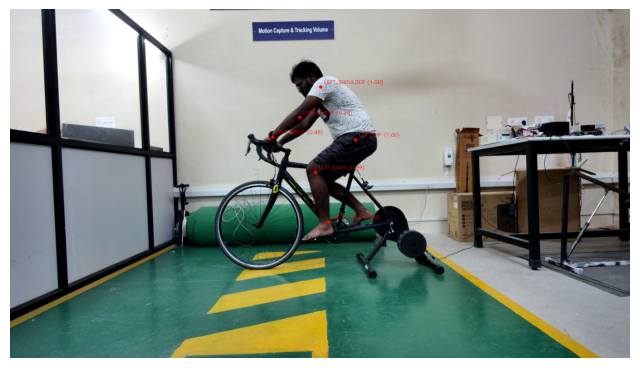

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# Define the keypoints to extract
SELECTED_LANDMARKS = {
    "LEFT_SHOULDER": mp_pose.PoseLandmark.LEFT_SHOULDER,
    "LEFT_ELBOW": mp_pose.PoseLandmark.LEFT_ELBOW,
    "LEFT_WRIST": mp_pose.PoseLandmark.LEFT_WRIST,
    "LEFT_HIP": mp_pose.PoseLandmark.LEFT_HIP,
    "LEFT_KNEE": mp_pose.PoseLandmark.LEFT_KNEE,
    "LEFT_ANKLE": mp_pose.PoseLandmark.LEFT_ANKLE,
}

def detect_and_draw_selected_keypoints(image_path):
    # Load image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize Pose model
    with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
        # Process the image
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            height, width, _ = image.shape
            normalized_keypoints = {}

            # Extract only normalized keypoints, confidence scores, and draw them
            for name, landmark_enum in SELECTED_LANDMARKS.items():
                landmark = results.pose_landmarks.landmark[landmark_enum]
                normalized_keypoints[name] = (landmark.x, landmark.y, landmark.visibility)
                x_pixel, y_pixel = int(landmark.x * width), int(landmark.y * height)
                cv2.circle(image, (x_pixel, y_pixel), 5, (0, 0, 255), -1)
                cv2.putText(image, f"{name} ({landmark.visibility:.2f})", (x_pixel + 10, y_pixel - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

            print("Normalized Keypoints (0-1 range) with Confidence Scores:")
            for name, point in normalized_keypoints.items():
                print(f"{name}: ({point[0]:.5f}, {point[1]:.5f}, {point[2]:.5f})")
            print("\n")
        else:
            print("No pose landmarks detected.")

        # Display the image inline in VS Code
        plt.figure(figsize=(8, 6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()

# Provide your image path here
image_path = r"C:\PJT2\Orbbec_Dataset_New\Orbbec_Dataset\Dataset\CHECK DATASET\checkdataset\6.png"# Change this to your image path
detect_and_draw_selected_keypoints(image_path) 
